In [1]:
import sys
import os
import inspect
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
this_folder = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_folder = os.path.dirname(this_folder)

In [3]:
sys.path.append(root_folder + '\\otm')
from otm_env import *
sys.path.append(root_folder + '\\agents')
from tab_q_learning import *

In [4]:
env_init_info = {
    "time_step": 30,
    "plot_precision": 2,
    "buffer": False,
    "state_division": 7
}

configfile = 'network_1.xml'

env = otmEnv(env_init_info, configfile)

agent_init_info = {
            "num_states": env_init_info["state_division"]**(env.otm4rl.num_intersections * env.otm4rl.num_stages),
            "num_actions": env.otm4rl.num_stages**env.otm4rl.num_intersections,
            "state_division": env.state_division,
            "epsilon": 1,
            "step_size": 0.1,
            "discount": 0.95,
            "seed": 0
            }

agent = TabQLearningAgent(agent_init_info)

 20%|█▉        | 3997/20000 [01:03<04:11, 63.60it/s]

Time-step: 4000/20000


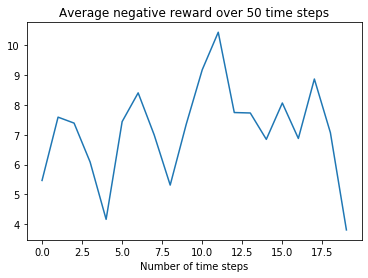

 40%|███▉      | 7998/20000 [02:06<03:29, 57.17it/s]

Time-step: 8000/20000


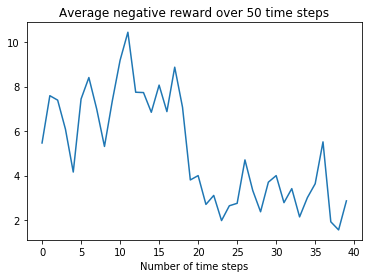

 60%|█████▉    | 11991/20000 [03:01<01:50, 72.25it/s]

Time-step: 12000/20000


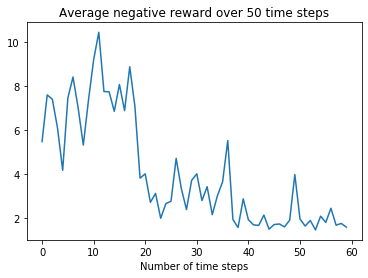

 80%|███████▉  | 15995/20000 [03:57<00:55, 71.64it/s]

Time-step: 16000/20000


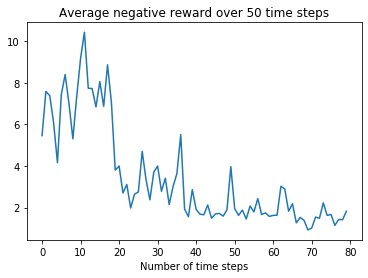

100%|█████████▉| 19994/20000 [04:53<00:00, 71.45it/s]

Time-step: 20000/20000


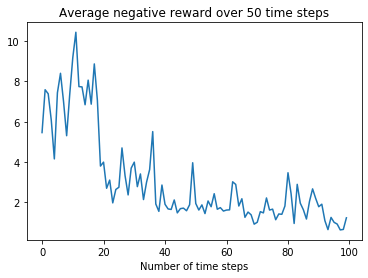

100%|██████████| 20000/20000 [04:54<00:00, 67.99it/s]


In [5]:
acc_neg_reward = [] # Contains negative sum of rewards during episode
num_steps = 20000   # The number of steps to run the simulation
reward_sum = 0

state = env.reset("current")
action = agent.agent_start(state)
    
for i in tqdm(range(num_steps)):
    
    state, reward = env.step(action)
    action = agent.agent_step(reward, state)
    
    reward_sum += reward
    
    if (i+1) % 200 == 0:
        acc_neg_reward.append(-reward_sum/200)
        reward_sum = 0
    
    if (i+1) % (num_steps/5) == 0:
        agent.epsilon -= 0.2
        print("Time-step: " + str(i+1) + "/" + str(num_steps))
        plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
        plt.xlabel("Number of time steps")
        plt.title("Average negative reward over 50 time steps")
        plt.show()
        
env.close()

Text(0.5, 1.0, 'Average negative reward over 50 time steps')

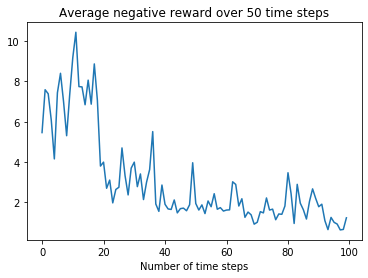

In [6]:
plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
plt.xlabel("Number of time steps")
plt.title("Average negative reward over 50 time steps")

In [7]:
agent.q

array([[-11.70730523, -11.50787894, -11.4925737 , -11.30777996],
       [-11.88399694, -11.38888766, -11.44678101, -11.22664394],
       [-11.25781363, -11.38295859, -11.21090831, -11.27596318],
       ...,
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [8]:
env.start()
env.buffer = True
state = env.reset("current")
rewards = []
for i in range(300):
    state = agent.encode_state(state)
    action = agent.argmax(agent.q[state])
    state, reward = env.step(action)
    rewards.append(reward)

print(np.mean(rewards[-10:]))

-0.6


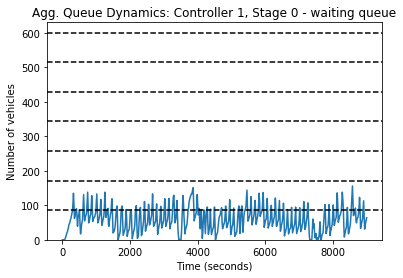

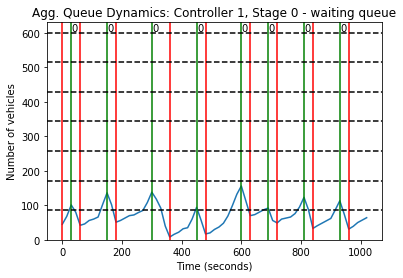

In [9]:
env.plot_agg_queue(1, 0, "waiting", plot_signals = False)
env.plot_agg_queue(1, 0, "waiting", start = 8000)

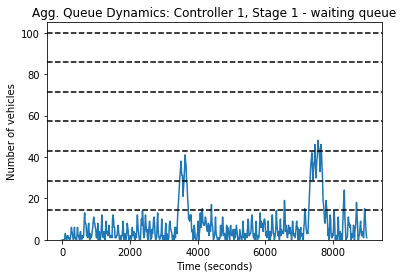

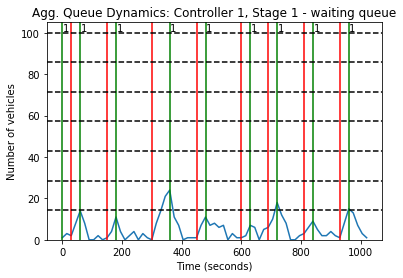

In [10]:
env.plot_agg_queue(1, 1, "waiting", plot_signals = False)
env.plot_agg_queue(1, 1, "waiting", start = 8000)

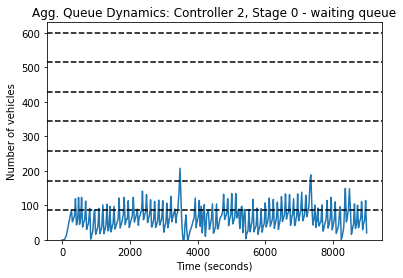

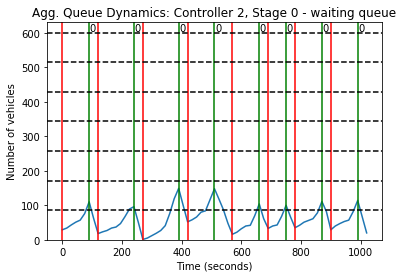

In [11]:
env.plot_agg_queue(2, 0, "waiting", plot_signals = False)
env.plot_agg_queue(2, 0, "waiting", start = 8000)

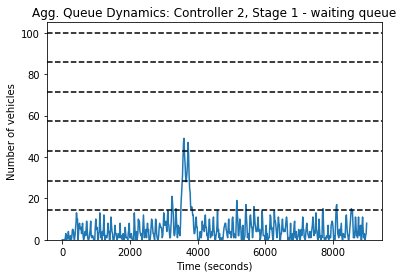

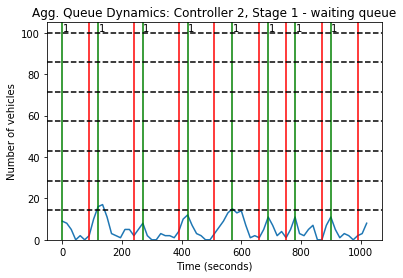

In [12]:
env.plot_agg_queue(2, 1, "waiting", plot_signals = False)
env.plot_agg_queue(2, 1, "waiting", start = 8000)

In [13]:
env.close()